# Classification: blind SQL injection vulnerability detection

In this notebook, I consider the problem of blind SQL injection vulnerability detection using the method of Classification. Specifically, given the round-trip-time (RTT) of a URL that was asked to go to sleep for a few seconds, the goal is to predict if the url is vulnerable to a blind SQL injection (label 1) or is safe (label 0).

**Dataset**

The training and test data sets for this problem is provided in the file `dataset_50000_2.csv`. Each row in these files corresponds to a url, with column 2 containing the sleep delay injected and column 3 containing the RTT. The last column contains the class label, and is based on the label of url, safe or vulnerable.

The dataset contains a total of 50,000 urls, of which the first half are vulnerable, while the remaining are all safe. 

**Optimization**

The goal is optimize the Classification algorithm for speed and accuracy. More speficically, it needs to have a true positive rate of less than 0.0001 (1 in 10,000)

Import libraries

In [14]:
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from statsmodels.distributions.empirical_distribution import ECDF
import sklearn.metrics as metrics
import pickle
import seaborn as sns
sns.set()

# Part (a): Data Exploration

In [15]:
dataset_df = pd.read_csv('Other/dataset_50000_2.csv')

In [17]:
dataset_df[dataset_df['Vulnerable'] == 1].head()

,URL,Sleep Delay,RTT,Vulnerable
0,http://localhost:5000/vulnerable/1/page?id=SLE...,2,14.356463,1
1,http://localhost:5000/vulnerable/2/page?id=SLE...,2,11.794838,1
2,http://localhost:5000/vulnerable/3/page?id=SLE...,2,15.530525,1
3,http://localhost:5000/vulnerable/4/page?id=SLE...,2,15.984062,1
4,http://localhost:5000/vulnerable/5/page?id=SLE...,2,12.523224,1


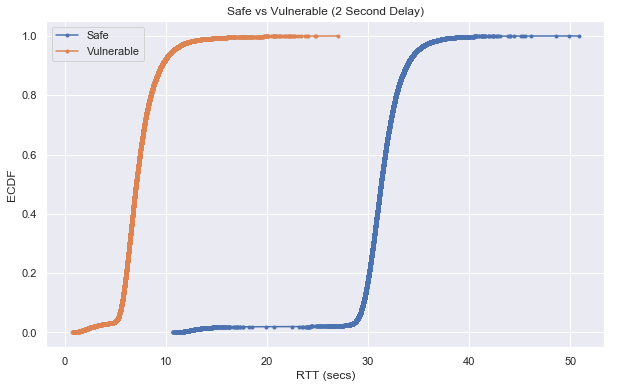

In [36]:
vul_data = dataset_df[dataset_df['Vulnerable']==1]
safe_data = dataset_df[dataset_df['Vulnerable']==0]

vul_ecdf = ECDF(vul_data['RTT']) 
safe_ecdf = ECDF(safe_data['RTT'])

plt.figure(figsize=(10, 6))
_ = plt.plot(vul_ecdf.x, vul_ecdf.y, marker='.')
_ = plt.plot(safe_ecdf.x, safe_ecdf.y, marker='.')
_ = plt.title('Safe vs Vulnerable (2 Second Delay)')
_ = plt.legend(('Safe', 'Vulnerable'), loc='best')
_ = plt.xlabel('RTT (secs)')
_ = plt.ylabel('ECDF')

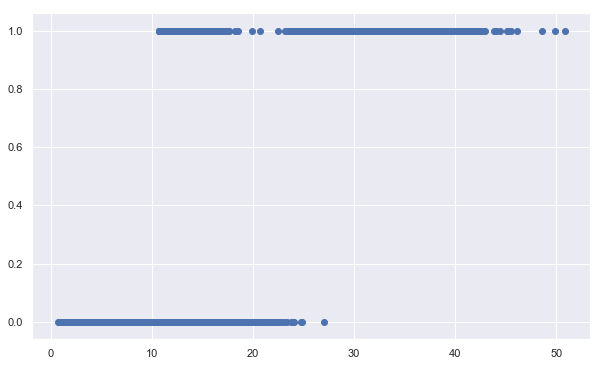

In [37]:
plt.figure(figsize=(10, 6))
_ = plt.scatter(dataset_df['RTT'], dataset_df['Vulnerable'])

## Part (b): Training the Classifier

In [20]:
x_train, x_test, y_train, y_test = train_test_split(dataset_df['RTT'], dataset_df['Vulnerable'], test_size=0.41, random_state=0)

In [21]:
svc_model = SVC(C=10, gamma='auto', kernel = 'rbf', probability=True)
svc_model.fit(np.array(x_train).reshape(-1,1), y_train)
y_predict = svc_model.predict(np.array(x_test).reshape(-1,1))
svc_score = svc_model.score(np.array(x_test).reshape(-1,1), y_test)


## Part (c): Evaluating and Optimizing

In [22]:
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9903414634146341
[[10254     3]
 [  195 10048]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10257
           1       1.00      0.98      0.99     10243

   micro avg       0.99      0.99      0.99     20500
   macro avg       0.99      0.99      0.99     20500
weighted avg       0.99      0.99      0.99     20500



In [86]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
print(fp/(fp+tn))

0.0002924831822170225


In [87]:
svc_score

0.9903414634146341

In [89]:
filename = 'svc_final_model.pickle'
pickle.dump(svc_model, open(filename, 'wb'))